In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu, f_oneway, kruskal
import networkx as nx
import matplotlib.pyplot as plt
import utils_PLS as upls
import scikit_posthocs as sp

In [2]:
def boxplot(dfs, value):
    """
    Create a boxplot for a specified value across different groups.

    This function takes a list of DataFrames, concatenates them into a single DataFrame,
    and creates a boxplot for the specified value, categorized by experimental groups.

    Parameters:
    dfs (list of pd.DataFrame): List of DataFrames containing the data to be plotted.
    value (str): The column name in the DataFrames that contains the values to be plotted.

    Returns:
    tuple: The figure and axis of the created plot.
    """
    # Concatenate all DataFrames into a single DataFrame
    df = pd.concat(dfs, ignore_index=True)

    # Create a figure and axis for the boxplot
    f, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5), sharey=True)

    # Generate the boxplot
    sns.boxplot(
        data=df,
        x="group",  # Grouping variable on the x-axis
        y=value,    # Variable to be plotted on the y-axis
        palette="Accent",  # Color palette
        ax=ax  # Axis to plot on
    )

    # Remove x-axis label
    ax.set_xlabel('')

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', labelrotation=90)

    return f, ax

# c57 with father

n_cells
KruskalResult(statistic=0.9200108533442091, pvalue=0.6312802197468721)
energy
KruskalResult(statistic=0.9140415140415286, pvalue=0.6331671972616968)
density
KruskalResult(statistic=3.061809795143134, pvalue=0.21633981334375155)
relative_density
KruskalResult(statistic=4.084981684981699, pvalue=0.12970523287396482)


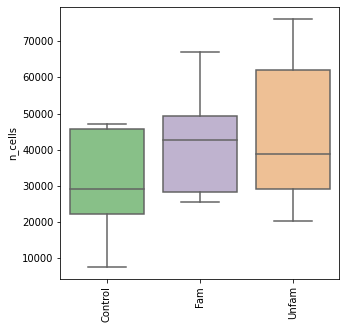

In [3]:
dict_results_across_mice = np.load(
    'dict_results/newvolumes/dict_results_across_mice_c57_merged_hemispheres_F6BL48.npy', 
                                   allow_pickle=True).item()

subjects = list(dict_results_across_mice.keys())

experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)

boxplot(ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
        experimental_groups=experimental_groups, 
        value='n_cells'), value='n_cells')

for value in ['n_cells', 'energy', 'density', 'relative_density']:
    print(value)
    df = ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
            experimental_groups=experimental_groups, 
            value=value)
    
    print(kruskal(*[df[key][value].to_numpy() for key in df.keys()]))

# c57 without father

n_cells
KruskalResult(statistic=2.215897435897432, pvalue=0.330235673283399)
energy
KruskalResult(statistic=1.961538461538467, pvalue=0.37502250901644885)
density
KruskalResult(statistic=1.7520512820512835, pvalue=0.41643468807096873)
relative_density
KruskalResult(statistic=3.1328205128205155, pvalue=0.20879335328423146)


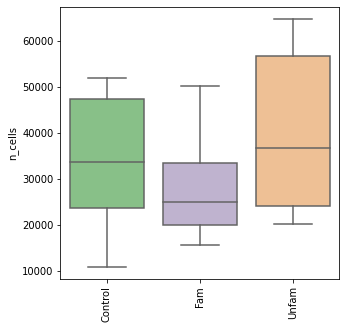

In [4]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_BL_woF2000_36.npy', 
                                   allow_pickle=True).item()

del dict_results_across_mice['BL21Fam']
del dict_results_across_mice['BL24Fam']
del dict_results_across_mice['BL19Unfam']

subjects = list(dict_results_across_mice.keys())

experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)

boxplot(ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
        experimental_groups=experimental_groups, 
        value='n_cells'), value='n_cells')

for value in ['n_cells', 'energy', 'density', 'relative_density']:
    print(value)
    df = ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
            experimental_groups=experimental_groups, 
            value=value)
    print(kruskal(*[df[key][value].to_numpy() for key in df.keys()]))

# WILD with father

n_cells
KruskalResult(statistic=0.8800219780219862, pvalue=0.6440293437987165)
energy
KruskalResult(statistic=0.2967032967032992, pvalue=0.8621278957784488)
density
KruskalResult(statistic=0.41558241758242787, pvalue=0.8123766361057339)
relative_density
KruskalResult(statistic=0.5856923076923266, pvalue=0.746136922163362)


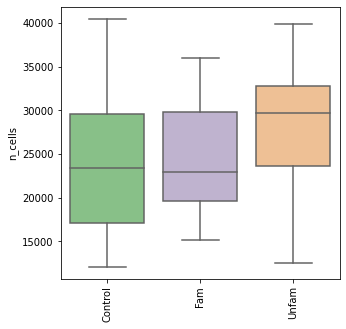

In [5]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_with_father2500_newwild.npy', 
                                   allow_pickle=True).item()

subjects = list(dict_results_across_mice.keys())

experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)

boxplot(ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
        experimental_groups=experimental_groups, 
        value='n_cells'), value='n_cells')

for value in ['n_cells', 'energy', 'density', 'relative_density']:
    print(value)
    df = ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
            experimental_groups=experimental_groups, 
            value=value)
    print(kruskal(*[df[key][value].to_numpy() for key in df.keys()]))

# WILD_without_father

n_cells
KruskalResult(statistic=4.481987577639757, pvalue=0.10635275966048233)
energy
KruskalResult(statistic=2.6269151138716467, pvalue=0.2688887491290317)
density
KruskalResult(statistic=2.163975155279502, pvalue=0.3389212235075171)
relative_density
KruskalResult(statistic=3.8059006211180133, pvalue=0.14912799565384136)


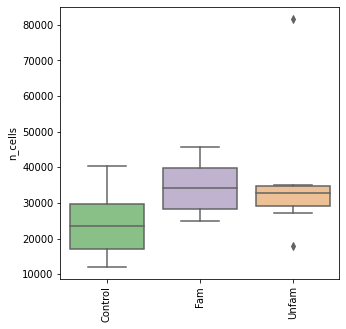

In [6]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_without_father2500.npy', 
                                   allow_pickle=True).item()

subjects = list(dict_results_across_mice.keys())

experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)

boxplot(ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
        experimental_groups=experimental_groups, 
        value='n_cells'), value='n_cells')

for value in ['n_cells', 'energy', 'density', 'relative_density']:
    print(value)
    df = ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
            experimental_groups=experimental_groups, 
            value=value)
    print(kruskal(*[df[key][value].to_numpy() for key in df.keys()]))

# Make kruskal test per area

## c57 with father

In [7]:
results = np.load('dict_results/newvolumes/dict_results_across_mice_c57_merged_hemispheres_F6BL48.npy',
                                    allow_pickle=True).item()

c57_wf = ace.kruskal_per_area(dictionary=results,
                 experimental_groups=utils.divide_in_exp_groups(list_subjects=list(results.keys())),
                 value='n_cells', level=8)
c57_wf

{'Infralimbic area': (KruskalResult(statistic=6.242515417019528, pvalue=0.0441016664831495),
            Control       Fam     Unfam
  Control  1.000000  0.050894  0.050894
  Fam      0.050894  1.000000  0.803950
  Unfam    0.050894  0.803950  1.000000),
 'Main olfactory bulb': (KruskalResult(statistic=7.539682539682545, pvalue=0.023055722635306922),
           Control      Fam    Unfam
  Control  1.00000  0.02399  0.02399
  Fam      0.02399  1.00000  1.00000
  Unfam    0.02399  1.00000  1.00000),
 'Accessory olfactory bulb': (KruskalResult(statistic=7.861294261294262, pvalue=0.019630964642816575),
           Control       Fam     Unfam
  Control  1.00000  0.021660  0.021660
  Fam      0.02166  1.000000  0.977299
  Unfam    0.02166  0.977299  1.000000),
 'Cortical amygdalar area': (KruskalResult(statistic=12.69744234903264, pvalue=0.001748982349931995),
            Control       Fam     Unfam
  Control  1.000000  0.003027  0.003027
  Fam      0.003027  1.000000  0.816207
  Unfam    0.0

## c57 without father

In [8]:
results = np.load('dict_results/newvolumes/dict_results_across_mice_BL_woF2000_36.npy',
                                    allow_pickle=True).item()
del results['BL44Control']

c57_wof = ace.kruskal_per_area(dictionary=results,
                 experimental_groups=utils.divide_in_exp_groups(list_subjects=list(results.keys())),
                 value='n_cells', level=8)
c57_wof

{'Main olfactory bulb': (KruskalResult(statistic=9.463265306122437, pvalue=0.008812072232091041),
            Control       Fam     Unfam
  Control  1.000000  0.042642  0.007216
  Fam      0.042642  1.000000  0.352542
  Unfam    0.007216  0.352542  1.000000),
 'Accessory olfactory bulb': (KruskalResult(statistic=13.355550708833142, pvalue=0.0012585747432411205),
            Control       Fam     Unfam
  Control  1.000000  0.009025  0.001091
  Fam      0.009025  1.000000  0.367251
  Unfam    0.001091  0.367251  1.000000),
 'Cortical amygdalar area': (KruskalResult(statistic=13.299092970521542, pvalue=0.001294609096658083),
            Control       Fam     Unfam
  Control  1.000000  0.067076  0.000814
  Fam      0.067076  1.000000  0.067076
  Unfam    0.000814  0.067076  1.000000),
 'Piriform-amygdalar area': (KruskalResult(statistic=11.695403954432361, pvalue=0.0028865248420391672),
            Control       Fam     Unfam
  Control  1.000000  0.217506  0.002850
  Fam      0.217506  1.0

# wild with father

In [9]:
results = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_with_father2500_newwild.npy',
                                    allow_pickle=True).item()

wild_wf = ace.kruskal_per_area(dictionary=results,
                 experimental_groups=utils.divide_in_exp_groups(list_subjects=list(results.keys())),
                 value='n_cells', level=8)
wild_wf

{'Cortical amygdalar area': (KruskalResult(statistic=10.257928873742648, pvalue=0.005922690619085436),
            Control       Fam     Unfam
  Control  1.000000  0.049652  0.006361
  Fam      0.049652  1.000000  0.330572
  Unfam    0.006361  0.330572  1.000000),
 'Postpiriform transition area': (KruskalResult(statistic=7.8060046189376555, pvalue=0.020181230101072523),
            Control       Fam     Unfam
  Control  1.000000  0.641463  0.021484
  Fam      0.641463  1.000000  0.049277
  Unfam    0.021484  0.049277  1.000000),
 "Ammon's horn": (KruskalResult(statistic=6.307714285714297, pvalue=0.04268715844988441),
            Control       Fam     Unfam
  Control  1.000000  0.057589  0.856224
  Fam      0.057589  1.000000  0.072627
  Unfam    0.856224  0.072627  1.000000),
 'Posterior amygdalar nucleus': (KruskalResult(statistic=13.680475456746649, pvalue=0.0010698490359350515),
            Control       Fam     Unfam
  Control  1.000000  0.005681  0.002710
  Fam      0.005681  1.00

## wild without father

In [10]:
results = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_without_father2500.npy',
                                    allow_pickle=True).item()

wild_wof = ace.kruskal_per_area(dictionary=results,
                 experimental_groups=utils.divide_in_exp_groups(list_subjects=list(results.keys())),
                 value='n_cells', level=8)
wild_wof

{'Primary motor area': (KruskalResult(statistic=10.507660455486544, pvalue=0.005227457651766495),
            Control       Fam     Unfam
  Control  1.000000  0.022249  0.010383
  Fam      0.022249  1.000000  0.742824
  Unfam    0.010383  0.742824  1.000000),
 'Secondary motor area': (KruskalResult(statistic=6.9760869565217405, pvalue=0.030560606207097732),
            Control       Fam     Unfam
  Control  1.000000  0.233035  0.025401
  Fam      0.233035  1.000000  0.233035
  Unfam    0.025401  0.233035  1.000000),
 'Agranular insular area': (KruskalResult(statistic=10.841511387163564, pvalue=0.004423802345317263),
            Control       Fam     Unfam
  Control  1.000000  0.159393  0.003181
  Fam      0.159393  1.000000  0.159393
  Unfam    0.003181  0.159393  1.000000),
 'Main olfactory bulb': (KruskalResult(statistic=9.827225672877844, pvalue=0.007345900794010483),
            Control       Fam     Unfam
  Control  1.000000  0.010440  0.042501
  Fam      0.010440  1.000000  0.441